# アダマールゲート

## ライブラリのインポート

In [1]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

## 量子回路の準備
２つのキュビットとビットを用意する

In [2]:
# 回路を作成する。
qc = QuantumCircuit(1, 1)

量子回路を記述

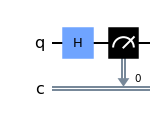

In [3]:
# HADゲートを回路に追加する。
qc.h(0)
# 測定する。
qc.measure(0,0)

qc.draw(output='mpl')

# 実行
試行数をshotsに指定してプログラムを量子コンピューターで実行

In [4]:
provider = IBMQ.load_account()
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)

least_busy_backend = least_busy(small_devices)
print('Least Busy Backend:', least_busy_backend)

job = execute(qc, least_busy_backend, shots=200)
job_monitor(job)
result = job.result()

Least Busy Backend: ibmq_manila
Job Status: job has successfully run


# 結果の確認

結果からビットパターン毎に何回そのパターンとなったかという数を取得.

In [5]:
counts = result.get_counts(qc)
# 0と1が同じくらいの割合で測定されるはず。。
# 要因 エラー
# 要因 ランダム性
print(counts)

{'0': 92, '1': 108}


## ヒストグラムの表示
ビットパターン毎の集計結果を棒グラフで表示.

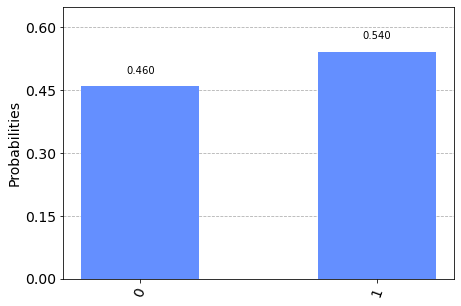

In [6]:
plot_histogram(counts)